In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
Mush = pd.read_csv('Mushroom2.csv')
Mush = Mush[['poison','odor','bruises','spore_print_color', 'population', 'habitat']]
Mush

,poison,odor,bruises,spore_print_color,population,habitat
0,poison,pungent,bruises,black,nscattered,urban
1,enable,almond,bruises,brown,numerous,grasses
2,enable,anise,bruises,brown,numerous,meadows
3,poison,pungent,bruises,black,nscattered,urban
4,enable,none,no,brown,abundant,grasses
...,...,...,...,...,...,...
8119,enable,none,no,buff,clustered,leaves
8120,enable,none,no,buff,several,leaves
8121,enable,none,no,buff,clustered,leaves
8122,poison,fishy,no,white,several,leaves


In [4]:
def change(col, text, to_text):
    Mush[col] = Mush[col].replace(text, to_text)

In [5]:
change('poison','poison',1)
change('poison','enable',0)

C:\Users\kjy19\AppData\Local\Temp\ipykernel_25176\222593503.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mush[col] = Mush[col].replace(text, to_text)


In [6]:
Mush

,poison,odor,bruises,spore_print_color,population,habitat
0,1,pungent,bruises,black,nscattered,urban
1,0,almond,bruises,brown,numerous,grasses
2,0,anise,bruises,brown,numerous,meadows
3,1,pungent,bruises,black,nscattered,urban
4,0,none,no,brown,abundant,grasses
...,...,...,...,...,...,...
8119,0,none,no,buff,clustered,leaves
8120,0,none,no,buff,several,leaves
8121,0,none,no,buff,clustered,leaves
8122,1,fishy,no,white,several,leaves


In [47]:
pip install pandas matplotlib scipy

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)


개수랑 비율 같이. column명도 바꿔서 표시
df['embark_town'].value_counts(dropna=False).to_frame('count').join(
    df['embark_town'].value_counts(dropna=False, normalize=True).to_frame('normalize')
).round(4)

### 어떤 특징이 가장 흔한가 ? 뭐가 가장 빈번한가?

In [23]:
vary = []
for c in Mush.columns[1:]:
    print(c, ':', Mush[c][Mush[c].value_counts().max()])
    vary.append(Mush[c][Mush[c].value_counts().max()])

odor : none
bruises : no
spore_print_color : brown
population : solitary
habitat : woods


In [39]:
common_Mush = Mush[
    (Mush['odor']=='none')&
    # (Mush['bruises']=='no')&
    # (Mush['spore_print_color']=='brown')&
    (Mush['population']=='solitary')&
    (Mush['habitat']=='woods')
]

In [45]:
common_Mush

,poison,odor,bruises,spore_print_color,population,habitat
305,0,none,bruises,brown,solitary,woods
335,0,none,bruises,black,solitary,woods
384,0,none,bruises,brown,solitary,woods
449,0,none,bruises,brown,solitary,woods
890,0,none,bruises,brown,solitary,woods
...,...,...,...,...,...,...
7292,0,none,no,white,solitary,woods
7717,0,none,no,white,solitary,woods
7779,0,none,no,white,solitary,woods
7887,0,none,no,white,solitary,woods


In [27]:
Mush[
    (Mush['odor']=='none')&
    (Mush['bruises']=='no')&
    (Mush['spore_print_color']=='brown')&
    # (Mush['population']=='solitary')&
    (Mush['habitat']=='woods')
]

,poison,odor,bruises,spore_print_color,population,habitat


In [24]:
idx = 1
for v in vary:
    Mush.columns[idx]
    
    idx += 1

['none', 'no', 'brown', 'solitary', 'woods']

### 임시선

In [8]:
for o in list(Mush['odor'].unique()):


IndentationError: expected an indented block (2603979853.py, line 1)

In [ ]:
# 독성 확률 구하는 함수
def per_calc(col):
    temp = []
    for c in list(Mush[col].unique()):
        try:
            a = Mush[Mush[col]==c]['poison'].value_counts()['enable']
        except:
            a = 0

        try:
            b = Mush[Mush[col]==c]['poison'].value_counts()['poison']
        except:
            b = 0

        # print(f" {c}, 식용 {a}, 독성 {b}")
        try:
            per = b / (a+b)
        except:
            per = 0
        # print("'"+c,' : ', round(per,2),"'", end=', ')

        temp.append(f"{c}:{round(per,2)}")
    
    return temp   # 깔별 

In [ ]:
per_calc('odor')

['pungent:1.0',
 'almond:0.0',
 'anise:0.0',
 'none:0.03',
 'foul:1.0',
 'creosote:1.0',
 'fishy:1.0',
 'spicy:1.0',
 'musty:1.0']

In [ ]:
list(Mush.columns[1:])

['odor', 'bruises', 'spore_print_color', 'population', 'habitat']

In [ ]:
for l in list(Mush.columns[1:]):
    temp = per_calc(l)
    print(temp)
    for first in temp:
        first = first.split(':')
        change(l,first[0],first[1])

['pungent:1.0', 'almond:0.0', 'anise:0.0', 'none:0.03', 'foul:1.0', 'creosote:1.0', 'fishy:1.0', 'spicy:1.0', 'musty:1.0']
['bruises:0.18', 'no:0.69']
['black:0.12', 'brown:0.11', 'purple:0.0', 'chocolate:0.97', 'white:0.76', 'green:1.0', 'orange:0.0', 'yellow:0.0', 'buff:0.0']
['nscattered:0.29', 'numerous:0.0', 'abundant:0.0', 'several:0.7', 'solitary:0.38', 'clustered:0.15']
['urban:0.74', 'grasses:0.34', 'meadows:0.12', 'woods:0.4', 'paths:0.88', 'waste:0.0', 'leaves:0.71']


In [ ]:
change('poison','poison',1)
change('poison','enable',0)


C:\Users\kjy19\AppData\Local\Temp\ipykernel_16580\222593503.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mush[col] = Mush[col].replace(text, to_text)


In [ ]:
Mush

,poison,odor,bruises,spore_print_color,population,habitat
0,1,1.0,0.18,0.12,0.29,0.74
1,0,0.0,0.18,0.11,0.0,0.34
2,0,0.0,0.18,0.11,0.0,0.12
3,1,1.0,0.18,0.12,0.29,0.74
4,0,0.03,0.69,0.11,0.0,0.34
...,...,...,...,...,...,...
8119,0,0.03,0.69,0.0,0.15,0.71
8120,0,0.03,0.69,0.0,0.7,0.71
8121,0,0.03,0.69,0.0,0.15,0.71
8122,1,1.0,0.69,0.76,0.7,0.71


In [ ]:
Mush.corr()

,poison,odor,bruises,spore_print_color,population,habitat
poison,1.000000,0.971003,0.501530,0.752637,0.487356,0.440130
odor,0.971003,1.000000,0.521547,0.722394,0.472839,0.460666
bruises,0.501530,0.521547,1.000000,0.518853,0.114923,0.350230
spore_print_color,0.752637,0.722394,0.518853,1.000000,0.312940,0.288753
population,0.487356,0.472839,0.114923,0.312940,1.000000,0.416636
habitat,0.440130,0.460666,0.350230,0.288753,0.416636,1.000000


ValueError: x and y must be the same size

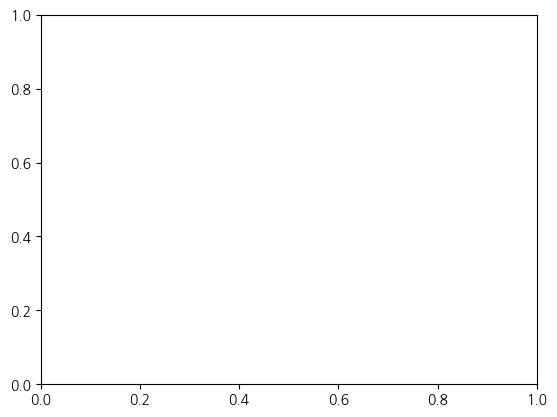

In [ ]:
# plt.scatter(Mush.iloc[1:],Mush.iloc[1])

In [ ]:
a = per_calc('odor')

a = list(a)

a

["'pungent:1.0'",
 "'almond:0.0'",
 "'anise:0.0'",
 "'none:0.03'",
 "'foul:1.0'",
 "'creosote:1.0'",
 "'fishy:1.0'",
 "'spicy:1.0'",
 "'musty:1.0'"]

In [ ]:
Mush

,poison,odor,bruises,spore_print_color,population,habitat
0,poison,pungent,bruises,black,nscattered,urban
1,enable,almond,bruises,brown,numerous,grasses
2,enable,anise,bruises,brown,numerous,meadows
3,poison,pungent,bruises,black,nscattered,urban
4,enable,none,no,brown,abundant,grasses
...,...,...,...,...,...,...
8119,enable,none,no,buff,clustered,leaves
8120,enable,none,no,buff,several,leaves
8121,enable,none,no,buff,clustered,leaves
8122,poison,fishy,no,white,several,leaves


In [ ]:
Mush['odor'].unique()

array(['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy',
       'spicy', 'musty'], dtype=object)

In [ ]:
i = 0



In [ ]:
Mush['gill_color']

KeyError: 'gill_color'